# Introduction to Forecasting
In the previous section we fit various smoothing models to existing data. The purpose behind this is to predict what happens next.<br>
What's our best guess for next month's value? For the next six months?

First we'll divide known data into training and testing sets, and evaluate the performance of a trained model on known test data.

* Goals
  * Compare a Holt-Winters forecasted model to known data
  * Understand <em>stationarity</em>, <em>differencing</em> and <em>lagging</em>
  * Introduce ARIMA and describe next steps

### <font color=blue>Simple Exponential Smoothing / Simple Moving Average</font>
This is the simplest to forecast. $\hat{y}$ is equal to the most recent value in the dataset, and the forecast plot is simply a horizontal line extending from the most recent value.
### <font color=blue>Double Exponential Smoothing / Holt's Method</font>
This model takes trend into account. Here the forecast plot is still a straight line extending from the most recent value, but it has slope.
### <font color=blue>Triple Exponential Smoothing / Holt-Winters Method</font>
This model has (so far) the "best" looking forecast plot, as it takes seasonality into account. When we expect regular fluctuations in the future, this model attempts to map the seasonal behavior.

## Forecasting with the Holt-Winters Method

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df.index.freq = 'MS'
df.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
Thousands of Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


# Teain-Test Splitting

In [8]:
train_data = df.iloc[:108] # Goes up to but not including 108
test_data = df.iloc[108:]

## Fitting the Model

In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

## Evaluating Model against Test Set

In [10]:
# YOU CAN SAFELY IGNORE WARNINGS HERE!
# THIS WILL NOT AFFECT YOUR FORECAST, IT'S JUST SOMETHING STATSMODELS NEEDS TO UPDATE UPON NEXT RELEASE.
test_predictions = fitted_model.forecast(36).rename('HW Forecast')

In [11]:
test_predictions.head()

1958-01-01    348.204345
1958-02-01    341.572414
1958-03-01    397.790545
1958-04-01    388.670276
1958-05-01    391.783211
Freq: MS, Name: HW Forecast, dtype: float64

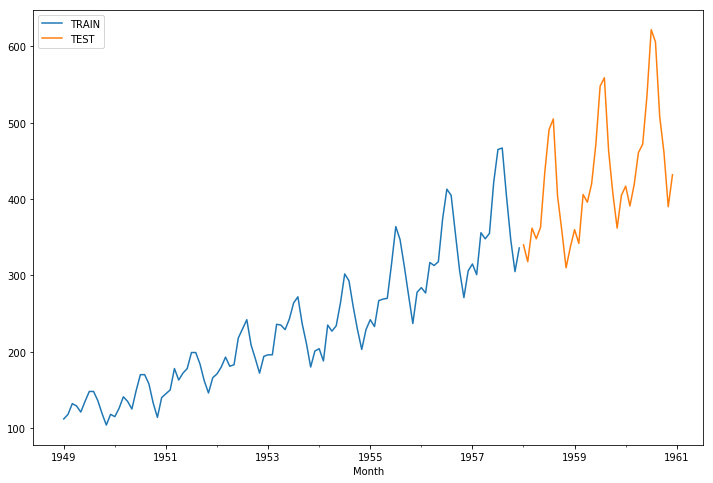

In [12]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8));

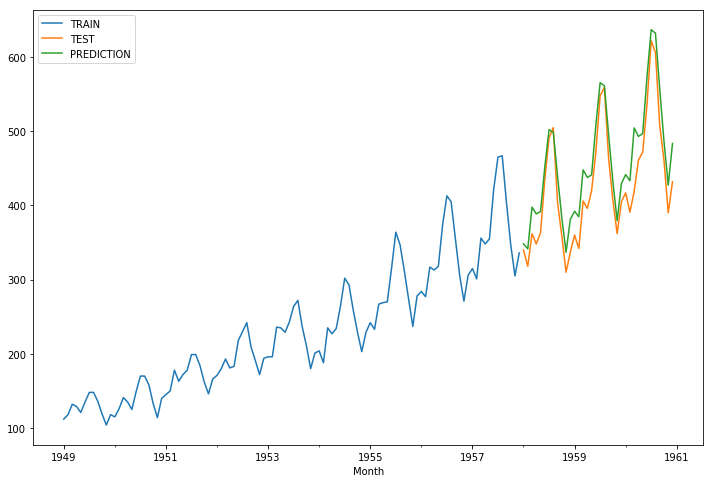

In [13]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

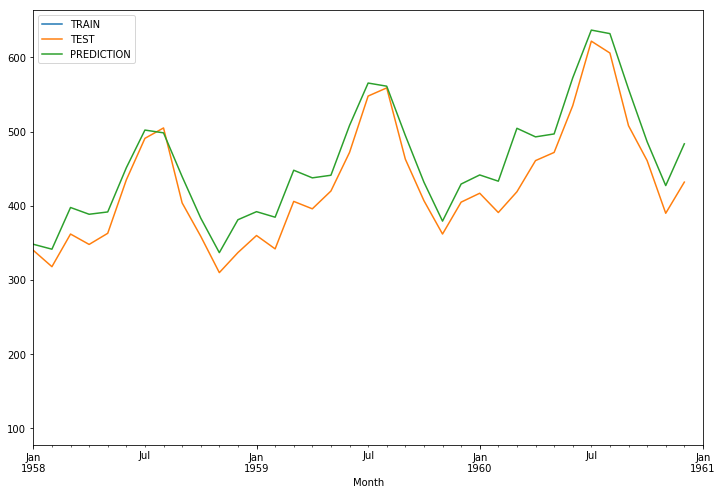

In [14]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['1958-01-01','1961-01-01']);

# <font color="yellow">Evaluation Metrics</font>
- [Brief Overview](https://github.com/juspreet51/templates/blob/master/tsa/jose/TSA_Evaluation_Metrics.ipynb)
- [Blog](https://github.com/juspreet51/templates/blob/master/tsa/jose/TSA_Evaluation_Metrics.ipynb)
- [Metrics NB](https://github.com/juspreet51/templates/blob/master/tsa/jose/TSA_Evaluation_Metrics.ipynb)

In [15]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [16]:
mean_absolute_error(test_data,test_predictions)

30.24228895401259

In [17]:
mean_squared_error(test_data,test_predictions)

1143.4649378653387

In [18]:
np.sqrt(mean_squared_error(test_data,test_predictions))

33.815158403670665

###  It can be noted that out RMSE is quite less than the STD value, so its a good performance

In [19]:
test_data.describe()

Thousands of Passengers
count                36.000000
mean                428.500000
std                  79.329152
min                 310.000000
25%                 362.000000
50%                 412.000000
75%                 472.000000
max                 622.000000

## Forecasting into Future
This will be done by retraining the model in the entirety of the dataset

In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
final_model = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit() #seasonal_period is 12 as 12 month cycle


In [21]:
forecast_predictions = final_model.forecast(36) #36 months in advance

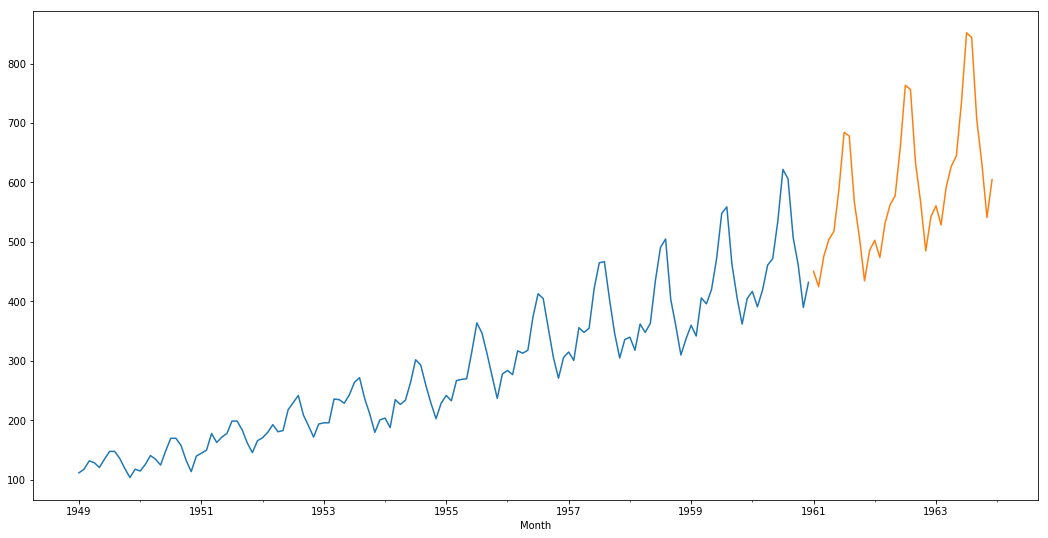

In [24]:
# Plotting original data and forecasted future forecasted data together:
df['Thousands of Passengers'].plot(figsize=(18,9)) 
forecast_predictions.plot() 

## Stationarity: TS Data not exhibiting Trend or Seasonality
That is, the mean, variance and covariance should be the same for any segment of the series, and are not functions of time
<div class="alert alert-info"><h3>For Further Reading:</h3>
<strong>
<a href='https://otexts.com/fpp2/stationarity.html'>Forecasting: Principles and Practice</a></strong>&nbsp;&nbsp;<font color=black>Stationarity and differencing</font></div>

In [25]:
df2 = pd.read_csv('../Data/samples.csv',index_col=0,parse_dates=True)
df2.head()

a   b  c
1950-01-01  36  27  0
1950-02-01  58  22  3
1950-03-01  61  17  5
1950-04-01  37  15  8
1950-05-01  66  13  8

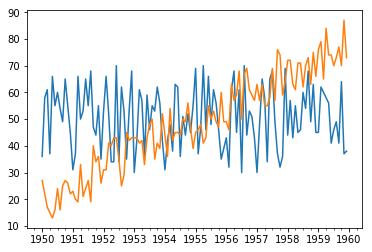

In [81]:
df2['a'].plot()
df2['b'].plot()

##### Non-Stationary data, i.e. df['b'] can be made to look like stationary data using a method called Differencing, i.e. by calculating the differnece between the consecutive points
&nbsp;&nbsp;&nbsp;&nbsp;$y^{\prime}_t = y_t - y_{t-1}$

             b  d1b
1950-01-01  27  NaN
1950-02-01  22 -5.0
1950-03-01  17 -5.0
1950-04-01  15 -2.0
1950-05-01  13 -2.0


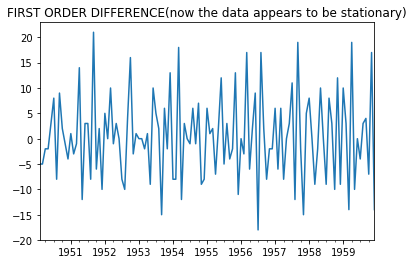

In [86]:
# Calculate the first difference of the non-stationary dataset "b"
df2['d1b'] = df2['b'] - df2['b'].shift(1)

print(df2[['b','d1b']].head());
df2['d1b'].plot(title="FIRST ORDER DIFFERENCE(now the data appears to be stationary)").autoscale(axis='x',tight=True);

An easier way to perform differencing on a pandas Series or DataFrame is to use the built-in ***.diff()*** method:

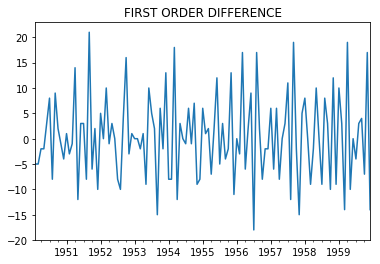

In [84]:
df2['d1b'] = df2['b'].diff(); 
df2['d1b'].plot(title="FIRST ORDER DIFFERENCE").autoscale(axis='x',tight=True);

## ACF and PACF: 
They are functions used to representa and plot TS data in different ways so that we can pick the parameteres for our ARIMA based forecasting models

**ACF:  Auto Correlation Function**
<br>An ACF plot shows the correlation of the series with itself, lagged by *x* time units, i.e. How Co-Related are today's sales to yesterday's sales?

PACF: Partial Auto Correlation Function
<br>The relationship betweem previous day residual vs the real value of the current day. It describes the direct relationship between an observation and its lag

These 2 can help to choose order parameters for ARIMA based models, however a grid search of the parameter value is much easier than attempt to read these plots directly